<img src="Header Curso 2.png" width="921" height="89" align="center"/>

<h1><center>Modelos predictivos con Machine Learning - AnáhuacX</center></h1>
<h2><center>Actividad 4: Clustering</center></h2>


En el siguiente ejercicio practicarás algunos de los comandos vistos durante la semana. Después de terminar tu practica responderás un formulario donde autoevaluaras tu desarrollo. <strong>Al finalizar deberás subir tu cuaderno en un archivo .zip</strong>. Es muy importante que subas tu cuaderno de la manera en cómo se indica.

En esta actividad responderás la pregunta: 
¿Cómo podemos hacer agrupación de registros?


<h3><center>Instrucciones</center></h3>

1. Ejecuta la siguiente linea de código para cargas las librerías fundamentales que se utilzarán durante el ejercicio y asegurar la reproducibilidad del mismo.

In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
seed(103) ## No muevas este parámetro, nos aseguramos de que tus resultados (si haces bien el ejercicio) 
         ## estén alineados con las opciones de la plataforma de edX.


2. Descarga y descomprime la base de datos <a href="https://courses.edx.org/asset-v1:AnahuacX+UVA-CP1-1x+3T2020+type@asset+block@Mall_Customers.zip">Mall_Customers.csv</a> (El archivo extraído debe de colocarse en la misma carpeta que este cuaderno). Lee el archivo con el paquete pandas. Recuerda usar el parametro `index_col=0` para indicar que la columna número cero es el índice. Guarda el conjnto de datos como variable `df`.

In [2]:
df = pd.read_csv("Mall_Customers.csv", index_col=0)
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
CustomerID                                                         
1             Male   19                  15                      39
2             Male   21                  15                      81
3           Female   20                  16                       6
4           Female   23                  16                      77
5           Female   31                  17                      40

3. __¿Cuál es el quinto registro del conjunto de datos?__

***

Analiza el conjunto de datos y busca responder las siguientes preguntas. Utiliza la función `head` y los atributos `columns`, `shape` y `dtypes` para buscar responder las preguntas.

4. __¿Cuáles son los nombres que reciben las variables de estudio?__
5. __¿Cuáles son los tipos de datos asociados a las columnas?__

In [3]:
df.head()
df.columns
df.shape
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

***
6. Prepara los datos utilizando las variables Dummy para representar las columnas que tengan variables donde existan dos o más categorías diferentes. 

In [4]:
columns_to_dummy = df.columns[df.dtypes == np.object]
df = pd.get_dummies(df, prefix=columns_to_dummy, drop_first=True)
df.head()

Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
CustomerID                                                              
1            19                  15                      39            1
2            21                  15                      81            1
3            20                  16                       6            0
4            23                  16                      77            0
5            31                  17                      40            0

7. __¿Qué columna debe transformarse a variable Dummy?__

***
8. Transforma el tipo de datos a flotante. Recuerda que puedes usar la función `astype(np.float)`. Imprime los primeros 5 renglones.



In [5]:
df = df.astype(np.float)
df.head()

Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
CustomerID                                                               
1           19.0                15.0                    39.0          1.0
2           21.0                15.0                    81.0          1.0
3           20.0                16.0                     6.0          0.0
4           23.0                16.0                    77.0          0.0
5           31.0                17.0                    40.0          0.0

9. __¿Cuál es la edad del tercer renglón?__

***
10. Utilizando las columnas “Spending Score” y “Annual Income”, realiza un agrupamiento de datos con el algoritmo “K-Means” con K = 3. Nota: En caso de ser necesario, guíate siguiendo el ejemplo encontrado en la libreta “Clustering y K-Means”. Usa el parametro `random_state=103`. 

In [6]:
from sklearn.preprocessing import StandardScaler,normalize
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) 
normalized_df = normalize(scaled_df) 
normalized_df = pd.DataFrame(normalized_df,columns=df.columns) 
normalized_df.head()

Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0 -0.558106           -0.681291               -0.170343     0.441978
1 -0.471952           -0.640673                0.440515     0.415628
2 -0.465296           -0.585001               -0.590188    -0.304879
3 -0.462273           -0.691205                0.422818    -0.360229
4 -0.280831           -0.828813               -0.197390    -0.441860

In [7]:
from sklearn.cluster import KMeans
n_clusters = 3
km = KMeans(n_clusters= n_clusters, random_state=103)
km.fit(normalized_df);

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male'] 
X_principal.head()

Annual Income (k$)  Spending Score (1-100)  Gender_Male
0            0.224007                0.409408    -0.784521
1            0.093617                0.680596    -0.735515
2           -0.305531               -0.190610    -0.578035
3           -0.597715                0.329012    -0.681212
4           -0.470396               -0.194969    -0.782746

***
11. Realiza la gráfica de dispersión con los clusters definidos.

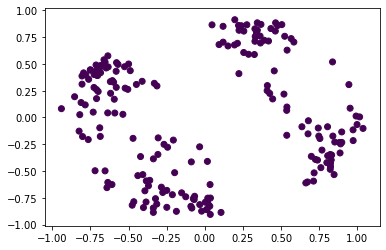

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_principal['Annual Income (k$)'], X_principal['Spending Score (1-100)'], c = km.predict(normalized_df));

***
12. Utilizando el método del codo (elbow), determina el número óptimo de Clusters y repite el paso 6 modificando el número de Clusters (parámetro K) por el valor obtenido.

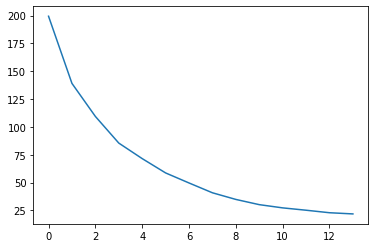

In [11]:
Sum_of_squared_distances = []
for k in range(1,15):
    km = KMeans(n_clusters=k)
    km = km.fit(normalized_df)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(Sum_of_squared_distances);

In [17]:
from sklearn.cluster import KMeans
n_clusters = 3
km = KMeans(n_clusters= n_clusters, random_state=103)
km.fit(normalized_df);

13. __¿Cuántos clústeres deberían ser empleados según el método del codo?__

***
14. Realiza la gráfica de dispersión con los clusters definidos. Analiza la gráfica de dispersión obtenida, identifica y describe el perfil de cliente por cluster.

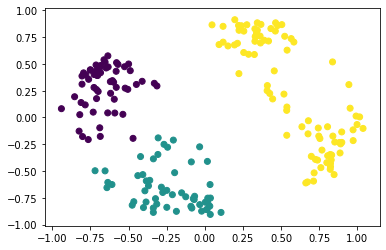

In [18]:
plt.scatter(X_principal['Annual Income (k$)'], X_principal['Spending Score (1-100)'], c = km.predict(normalized_df));

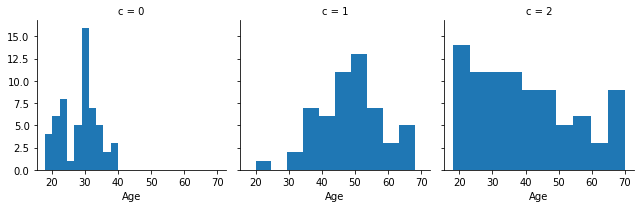

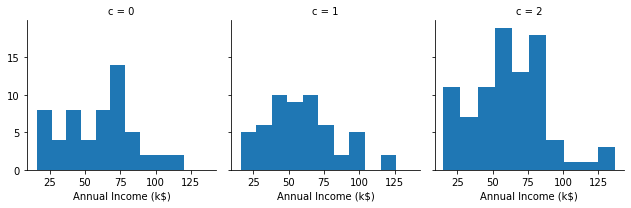

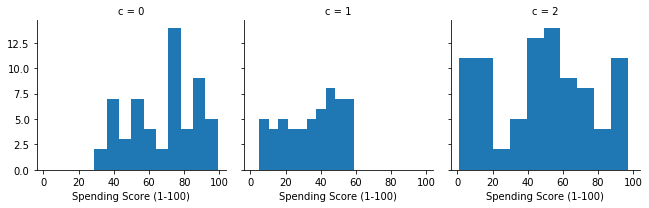

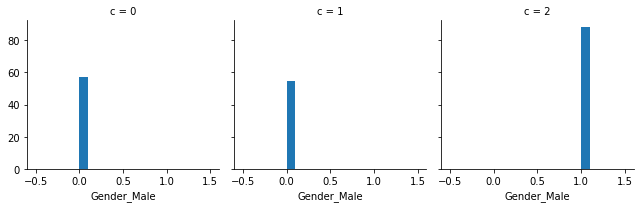

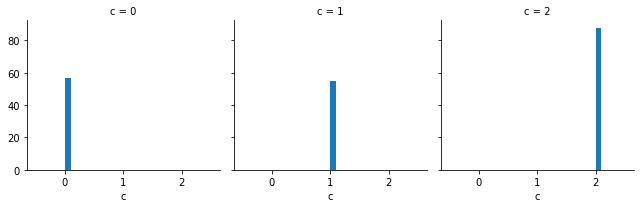

In [19]:
df["c"] = km.predict(normalized_df)
df.head()
import seaborn as sns
for col in df:
    grid= sns.FacetGrid(df, col='c')
    grid.map(plt.hist, col)

15. __¿En donde se centra el clúster más poblado?__

16. Guarda tu libreta y colócala en una carpeta comprimida con extensión .zip. Sube el archivo .zip a la plataforma de EdX y califica los ejercicios de tus demás compañeros.

<img src="Anáhuac_edX.png" width="498" height="150" align="center"/>